In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Kaggle\CS.csv')

In [3]:
df.head(10)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   
4        2       3  22615   5410     7198    3915              1777   
5        2       3   9413   8259     5126     666              1795   
6        2       3  12126   3199     6975     480              3140   
7        2       3   7579   4956     9426    1669              3321   
8        1       3   5963   3648     6192     425              1716   
9        2       3   6006  11093    18881    1159              7425   

   Delicassen  
0        1338  
1        1776  
2        7844  
3        1788  
4        5185  
5        1451  
6         545  
7        2566  
8         750  
9        2098

In [4]:
df.drop(["Channel", "Region"], axis=1, inplace=True)

In [5]:
# Display a description of the dataset
display(df.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

In [6]:
# TODO: Select three indices of to sample from the dataset
indices = [26,176,392]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print ("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   9898   961     2861    3151               242         833
1  45640  6958     6536    7368              1532         230
2    518  4180     3600     659               122         654

# Guessing Establishments
Considering the total purchase cost of each product category and the statistical description of the dataset above for our sample customers. What kind of establishment (customer) could each of the three samples we've chosen represent?

Looking at the total purchase of each product category above and comparing them with the medians of the distributions, we can guess that:

The first customer in the sample (Index 0), might be from a restaurant. We see high amounts of Frozen, close to median amount of Fresh and Deli. So this can be from a restaurant.
The second customer in the sample (Index 1), might be from a supermarket. We see really high or close to median levels of purchases of all category of products excluding deli. So maybe the supermarket doesn't have a deli section.
The third customer in the sample (Index 2), might represent a cafe. We see a high purchase of milk and somewhat close to median levels for Groceries and Deli. We also see a relatively lower purchase of fresh produce and frozen goods.
# Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

Lets do this for the 'Milk' feature.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df.drop(['Milk'],axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data,df['Milk'],test_size=0.25,random_state=101)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=101).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print (score)

0.29571438444092835


# Feature Relevance Prediction
We tried to predict the 'Milk' feature (i.e. annual spending on milk products), based on the other features in the dataset (annual spending on other product categories).

The predicted R2 score was 0.2957. As we know that the R2 is between 0 and 1, the model we built for customer's milk purchasing is quite low, however it is possible to see some correlation between this feature and others. 

It's safe to say that the 'Milk' feature is necessary for identifying customer's spending habits because it isn't possible to predict how a customer spends on Milk based on their spending on the other product categories. We can say that the 'Milk' feature adds extra information to the data which is not easily inferable by model only through looking at the other features.

# Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If it is found that the feature we attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. At the same time, if we believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

In [8]:
# Produce a scatter matrix for each pair of features in the data
px.scatter_matrix(df)

# Correlations
Looking at the plot above, there are a few pairs of features that exhibit some degree of correlation. They include:

Milk and Groceries
Milk and Detergents_Paper
Grocery and Detergents_Paper
As we tried to predict the 'Milk' feature earlier, this confirms the suspicion that Milk isn't correlated to most of the features in the dataset, although it shows a mild correlation with 'Groceries' and 'Detergents_Paper'.

The distribution of all the features appears to be similar. It is strongly right skewed, in that most of the data points fall in then first few intervals. Judging by the summary statistics, especially the mean and maximum value points, of the features that we calculated earlier, we can expect that there are some outliers in each of the distributions. This conforms with the fact that there's a significant different between the mean and the median of the feature distributions.

# Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

# Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = df.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
px.scatter_matrix(log_data)

# Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal.

Let's check out our log transformed samples.

In [10]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0   9.200088  6.867974  7.958926  8.055475          5.488938    6.725034
1  10.728540  8.847647  8.785081  8.904902          7.334329    5.438079
2   6.249975  8.338067  8.188689  6.490724          4.804021    6.483107

In [11]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
  # Display the outliers
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    print ("Data points considered outliers for the feature '{}':".format(feature))
    
#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicassen
65   4.442651   9.950323  10.732651  3.583519         10.095388    7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333    3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184    5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172    6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043    5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909    1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434    8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731    6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746    8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413    7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037    5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050    6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007    7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936    4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853    4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317    4.127134

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicassen
86   10.039983  11.205013  10.377047  6.894670          9.906981    6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352    4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910    2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225    6.306275

Data points considered outliers for the feature 'Milk':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
75   9.923192  7.036148  1.098612  8.390949          1.098612    6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910    2.079442

Data points considered outliers for the feature 'Grocery':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicassen
38    8.431853  9.663261   9.723703   3.496508          8.847360    6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213    7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388    7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738    8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887    7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176    7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346    8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321    7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817    7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516    3.951244

Data points considered outliers for the feature 'Frozen':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
75   9.923192  7.036148  1.098612  8.390949          1.098612    6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612    7.711101

Data points considered outliers for the feature 'Detergents_Paper':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen
66    2.197225   7.335634   8.911530   5.164786          8.151333    3.295837
109   7.248504   9.724899  10.274568   6.511745          6.728629    1.098612
128   4.941642   9.087834   8.248791   4.955827          6.967909    1.098612
137   8.034955   8.997147   9.021840   6.493754          6.580639    3.583519
142  10.519646   8.875147   9.018332   8.004700          2.995732    1.098612
154   6.432940   4.007333   4.919981   4.317488          1.945910    2.079442
183  10.514529  10.690808   9.911952  10.505999          5.476464   10.777768
184   5.789960   6.822197   8.457443   4.304065          5.811141    2.397895
187   7.798933   8.987447   9.192075   8.743372          8.148735    1.098612
203   6.368187   6.529419   7.703459   6.150603          6.860664    2.890372
233   6.871091   8.513988   8.106515   6.842683          6.013715    1.945910
285  10.602965   6.461468   8.188689   6.948897          6.077642    2.890372
289  10.663966   5.655992   6.154858   7.235619          3.465736    3.091042
343   7.431892   8.848509  10.177932   7.283448          9.646593    3.610918

Data points considered outliers for the feature 'Delicassen':
Outliers: [128, 65, 66, 75, 154]
The good dataset now has 435 observations after removing outliers.


Upon quick inspection, our sample doesn't contain any of the outlier values.

There were 5 data points that were considered outliers for more than one feature based on our definition above. So, instead of removing all outliers (which would result in us losing a lot of information), only outliers that occur for more than one feature are removed.

We can also analyse these outliers independently to answer questions about how or when they occur (root cause analysis), but they might not be suitable for an aggregate analysis.

# Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

# PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the explained variance ratio of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In [12]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=4)            # 2. Instantiate the model with hyperparameters
model.fit(good_data)                   # 3. Fit to data.
X_4D = model.transform(good_data)      # 4. Transform the data to 4 dimensions

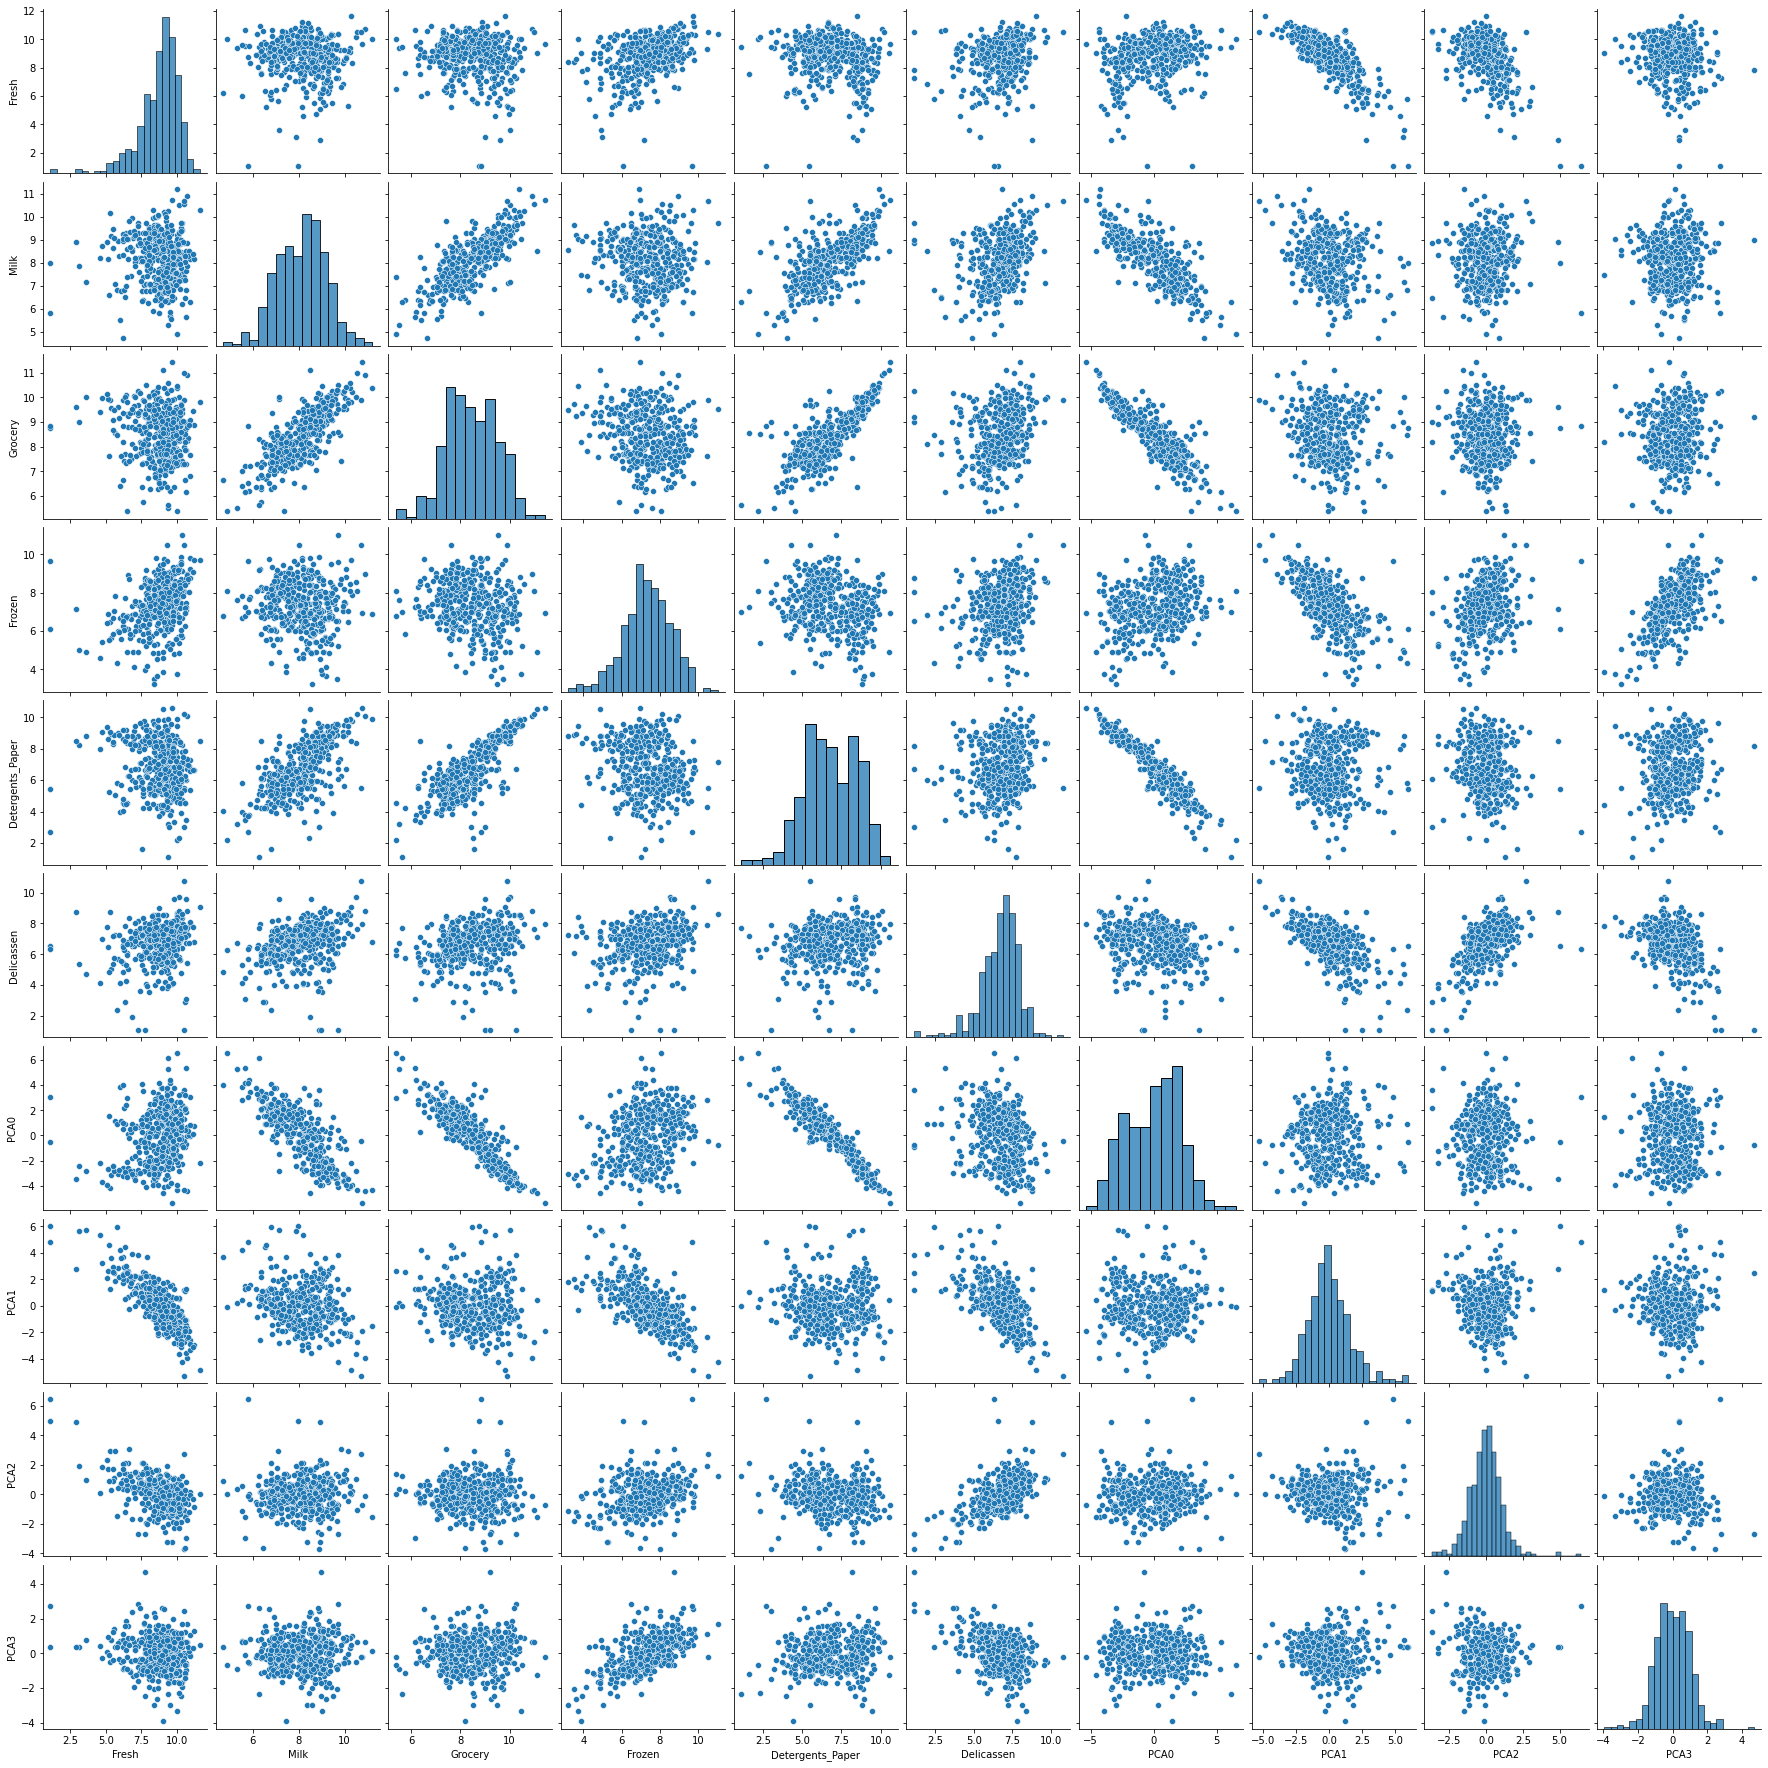

In [13]:
good_data['PCA0'] = X_4D[:, 0]
good_data['PCA1'] = X_4D[:, 1]
good_data["PCA2"] = X_4D[:, 2]
good_data["PCA3"] = X_4D[:, 3]
sns.pairplot(good_data)

In the chart above we added 4 dimensions. PCA 0, PCA 1, PCA 2 and PCA 3. In an analysis we can see that there is support for PCA 0 and PCA 1. Specifically:

* PCA 0 has a positive weight for Milk, Grocery and Detergents_Paper features. This could represent entities where these items are delivered / served to clients such as Hotels.

* PCA 1 has a positive weight for Fresh, Frozen and Delicassen. This could represent places such as restaurants that serve a a variety of products to their clients.

* PCA 2 has a positive weight for Fresh and Delicassen, however the relation is much weaker, this could represent Caffes.

At first glance, there seems to be no support for PCA 3, but below we will try to analyze what is the percentage support for each PCA.


In [14]:
pca = PCA()
components = pca.fit_transform(good_data)
labels = {
    str(i): f"PCA {i+0} ({var:.0f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    X_4D,
    labels=labels,
    dimensions=range(4))


fig.show()


We can see that PCA 0 and PCA 1 explain 73% of the data.


# Clustering

In this section, we will choose a K-Means clustering algorithm to identify the various customer segments hidden in the data.

Advantages of K-Means clustering:

* Simple, easy to implement and interpret results.
* Good for hard cluster assignments i.e. when a data point only belongs to one cluster over the others.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 2, init= "k-means++")
label = kmeans.fit_predict(X_4D)
u_labels = np.unique(label)

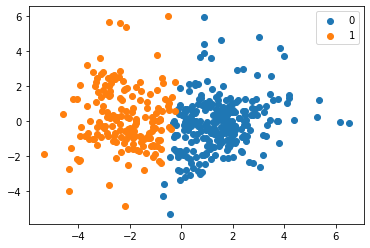

In [16]:
for i in u_labels:
    plt.scatter(X_4D[label == i , 0] , X_4D[label == i , 1] , label = i)
plt.legend()
plt.show()

Based on the resulting clusters, we can clearly see two delimited groups.

Cluster 0: This cluster best represents supermarkets. 

Cluster 1: This cluster best represents restaurants.

# Conclusion

In this unsupervised machine learning project, we analyzed and used 2 algorithms to sort and find patterns in data, namely Principal Component Analysis and K-means.
From this project we could deduce the creation of 2 types of consumers that best represent the 2 clusters - Supermarkets and Restaurants.